# Time series

In [1]:
# For arrays and other numerical operations
# (any function from this module can be used by typing np.FunctionName)
import numpy as np
import warnings

# For plotting
import matplotlib.pyplot as plt

For an AR(p) process to be stable, the roots of the polynomial $\phi(\cdot)$ must lie outside of the unit circle

In [2]:
def check_stability(p, phi):
    poly = np.zeros(p+1)
    poly[0:p] = -phi
    poly[p] = 1
    r = np.roots(poly)
    if any(np.abs(r) <= 1):
        warnings.warn('The process is not stable')
    return r

In [3]:
def plot_process(proc, order, mu, coeff, n, nof, disp_traj=True):
    #
    # Compute realisations of a AR or MA process and displays the trajectories,
    # moments and autocorrelation function
    #
    # Inputs:
    # proc    Name of process (AR or MA)
    # order   Order of the process
    # mu      Mean
    # coeff   Coefficients
    # n       Number of time steps
    # nof     Number of realisations
    # Optional imputs:
    # disp_traj    (bool) Display trajectory of each realisation
    
    # If the process is an AR(p) then stability needs to be checked
    if proc == 'AR':
        check_stability(order, coeff)
    elif not(proc == 'MA'):
        raise Exception('Unknown process type')
    
    # For more than 100 realisations, individual trajectories are not shown
    if nof > 100:
        disp_traj = False
    
    # To avoid boundary effects, the process is initialised earlier
    burn_in = 25 * order
    
    # Computation of the realisations of the process
    y = np.zeros((nof, n+burn_in))
    eps = np.random.randn(nof, n+burn_in)
    for N in range(nof):
        y[N, 0] = mu
        for k in range(1, n+burn_in):
            s = max(k-order, 0)
            if proc == 'AR':
                y[N, k] = mu + np.matmul(coeff[0:k-s], y[N, s:k] - mu) + eps[N, k]
            elif proc == 'MA':
                y[N, k] = mu + np.matmul(coeff[0:k-s], eps[N, s:k]) + eps[N, k]
            else:
                raise Exception('Unknown process type')
        
        # Display trajectories
        if disp_traj:
            plt.plot(y[N, burn_in:n+burn_in], '-', LineWidth=.25, color='k')
            plt.xlabel('time steps')
            plt.ylabel('value');
            
    return y

# Moments
def display_moments(y, n):
    nof = np.size(y, 0)
    burn_in = np.size(y, 1) - n
    mean = np.zeros(n)
    for k in range(burn_in, n+burn_in):
        mean[k-burn_in] = np.sum( y[:, k] ) / nof
    plt.figure()
    plt.plot(mean, label='mean')
    
    if nof > 1:
        std_dev = np.zeros(n)
        for k in range(burn_in, n+burn_in):
            std_dev[k-burn_in] = np.sqrt( np.sum( (y[:, k] - mean[k-burn_in])**2 ) / (nof-1) )
        
        for i in range(2,4):
            plt.fill_between(np.linspace(0,n-1,n),
                     y1=mean-i*std_dev,
                     y2=mean+i*std_dev, color='r', alpha=.1, label='+- {} std dev'.format(i))
    plt.xlabel('time steps')
    plt.ylabel('value')
    plt.legend()

    
# Autocorrelation
def display_acf(y, n, n_acf):
    burn_in = np.size(y, 0) - n
    mean = np.sum( y[burn_in:n+burn_in] ) / n
    var = np.sum( (y[burn_in:n+burn_in] - mean)**2 ) / (n-1)
    #n_acf = int(10)
    acf = np.zeros(n_acf)
    for k in range(n_acf):
        acf[k] = np.sum(np.multiply(y[burn_in:burn_in+n-k] \
                                    - mean, y[burn_in+k:n+burn_in] - mean)) / ((n-k)*var)
    plt.figure()
    plt.plot(acf)
    plt.xlabel('time steps')
    plt.ylabel('autocorrelation')

Let's define some parameters and study different models

In [4]:
# Mean
mu = 5
# Number of time steps
n = 500

## AR(p) process

### AR(1) : $y_k = \mu + \phi_1(y_{k-1} - \mu) + \epsilon_k$

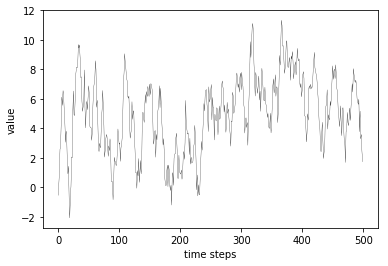

In [36]:
# Let's look at realisations of the process
p = 1
phi = np.array([0.9])
y = plot_process('AR', p, mu, phi, n, 1)

We can check that the mean and variance look roughly constant

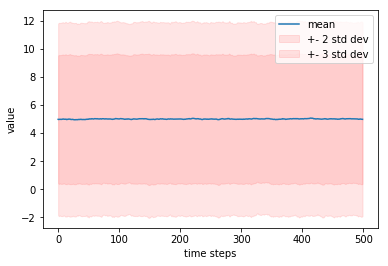

In [28]:
display_moments(y, n)

If we want to be sure, we can consider more trajectories, say 1000

In [ ]:
y = plot_process('AR', p, mu, phi, n, 100)
display_moments(y, n)

Now, let's look at the sample autocorrelation function (acf) for the first trajectory

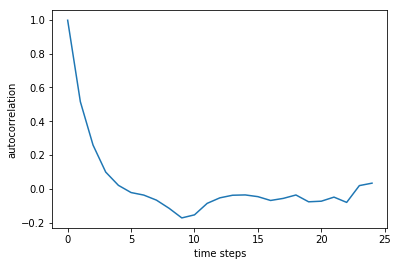

In [35]:
display_acf(y[0,:], n, 25)

The autocorrelation decreases slowly because we consider a value of $\phi_1$ that is close to 1. If we were to take a smaller value, it would decrease faster (remember that the autocorrelation was found to be $\rho_{\delta} = \phi_1^{\delta}$ in the lecture notes)

In [ ]:
phi = np.array([0.5])
y = plot_process('AR', p, mu, phi, n, 1, disp_traj=False)
display_acf(y[0,:], n, 25)

### AR(2) : $y_k = \mu + \phi_1(y_{k-1} - \mu) + \phi_2(y_{k-2} - \mu) + \epsilon_k$

We estimate the acf for AR(2) processes

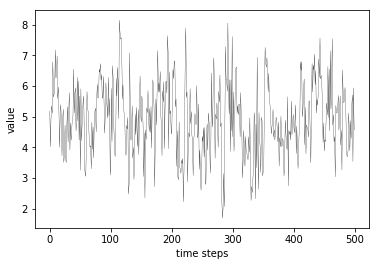

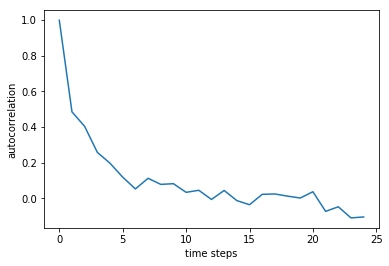

In [39]:
p = 2
n = 500
phi = np.array([.3, .3])
y = plot_process('AR', p, mu, phi, n, 1)
display_acf(y[0,:], n, 25)

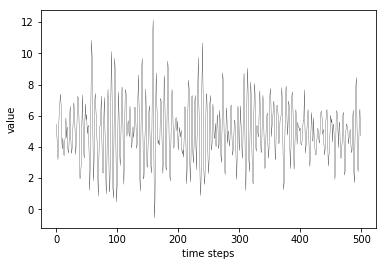

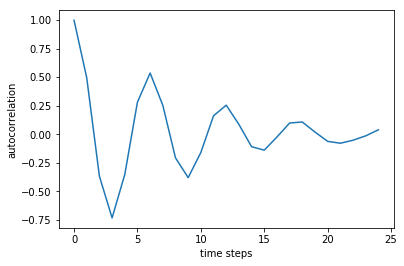

In [43]:
p = 2
phi = np.array([-.8, .9])
y = plot_process('AR', p, mu, phi, n, 1)
display_acf(y[0,:], n, 25)

It appears from these results that the acf can vary significantly when we vary the coefficients of an AR(2) process. In particular, all acfs are not positive and decreasing.

### AR(3) : $y_k = \mu + \phi_1(y_{k-1} - \mu) + \phi_2(y_{k-2} - \mu) + \phi_3(y_{k-3} - \mu) + \epsilon_k$

C:\Users\Jeremie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The process is not stable
  import sys


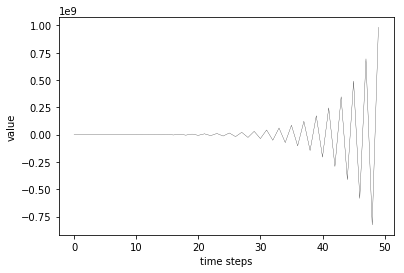

In [44]:
# This is an unstable process
p = 3
phi = np.array([-.75, .25, -.45])
y = plot_process('AR', p, mu, phi, 50, 1)

AR processes are not always stable (the roots of the polynomial $\phi(\cdot)$ have to lie outside the unit circle). By changing the sign of the second coefficient, we obtain a stable process.

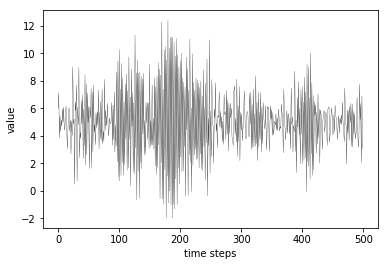

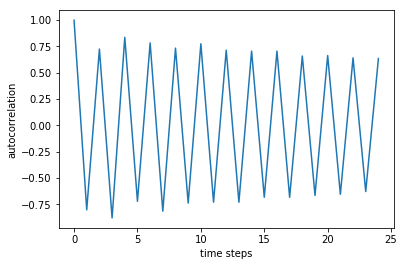

In [46]:
# This is a stable process
p = 3
phi = np.array([-.75, -.25, -.45])
y = plot_process('AR', p, mu, phi, n, 1)
display_acf(y[0,:], n, 25)

## MA(q) process

### MA(1) : $y_k = \mu + \epsilon_k + \psi_1\epsilon_{k-1}$

In [47]:
q = 1
n = 500
psi = np.array([1])
y = plot_process('MA', q, mu, psi, n, 1000)

We can check that MA processes also have a constant mean and variance

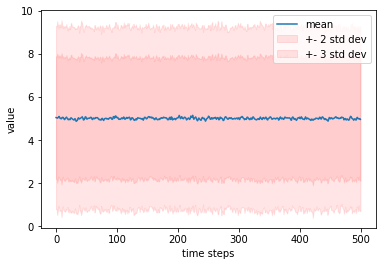

In [48]:
display_moments(y, n)

However, their acf vanishes as soon as the lag is greater than the order of the process

Autocorrelation: 0.09900990099009901


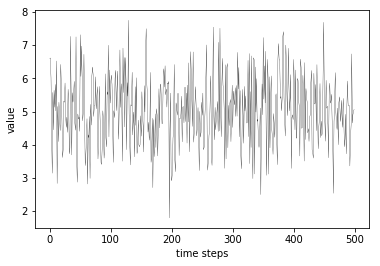

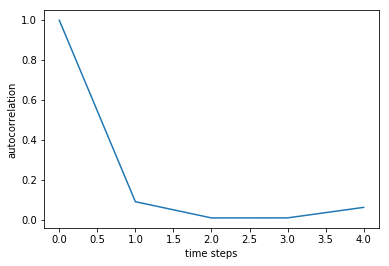

In [51]:
q = 1
psi = np.array([.1])
y = plot_process('MA', q, mu, psi, n, 1)
display_acf(y[0,:], n, 5)
print('Autocorrelation:',psi[0]/(1+psi[0]**2))

We can verify than inverting $\psi$ does not change the autocorrelation

Autocorrelation: 0.09900990099009901


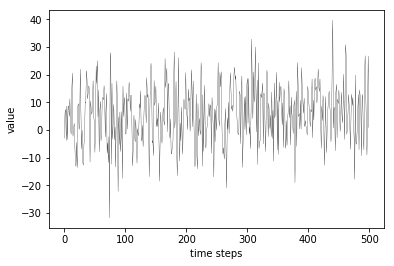

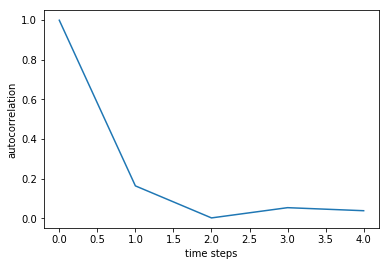

In [52]:
q = 1
psi = 1.0/psi
y = plot_process('MA', q, mu, psi, n, 1)
display_acf(y[0,:], n, 5)
print('Autocorrelation:',psi[0]/(1+psi[0]**2))

### MA(3) : $y_k = \mu + \epsilon_k + \psi_1\epsilon_{k-1} + \psi_2\epsilon_{k-2} + \psi_3\epsilon_{k-3}$

MA processes are always stable

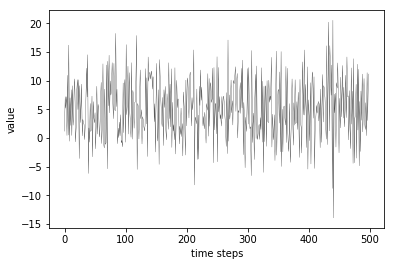

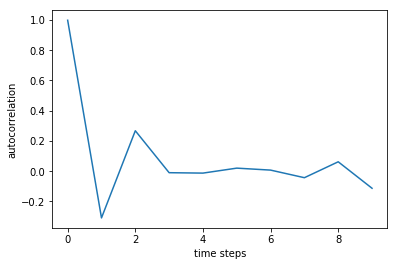

In [54]:
# This is now a stable process
q = 3
psi = np.array([-.75, .25, -.45])
y = plot_process('MA', q, mu, psi, n, 1)
display_acf(y[0,:], n, 10)

Once again we verify the fact that the acf vanishes